In [218]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image




ValueError: Mountpoint must not contain a space.

# REGRESI LINEAR
**rumus persamaan regresi linear**




**y1 - y2 = (Sxy)/(Sx^2) * (x1 -x2)**

* y2 = sum(y) /n
* x2 = sum(x) /n
* Sxy = sum(xy) /n - (y1 * x1)
* Sx^2 = (sum(x)^2) /n - (x2)^2

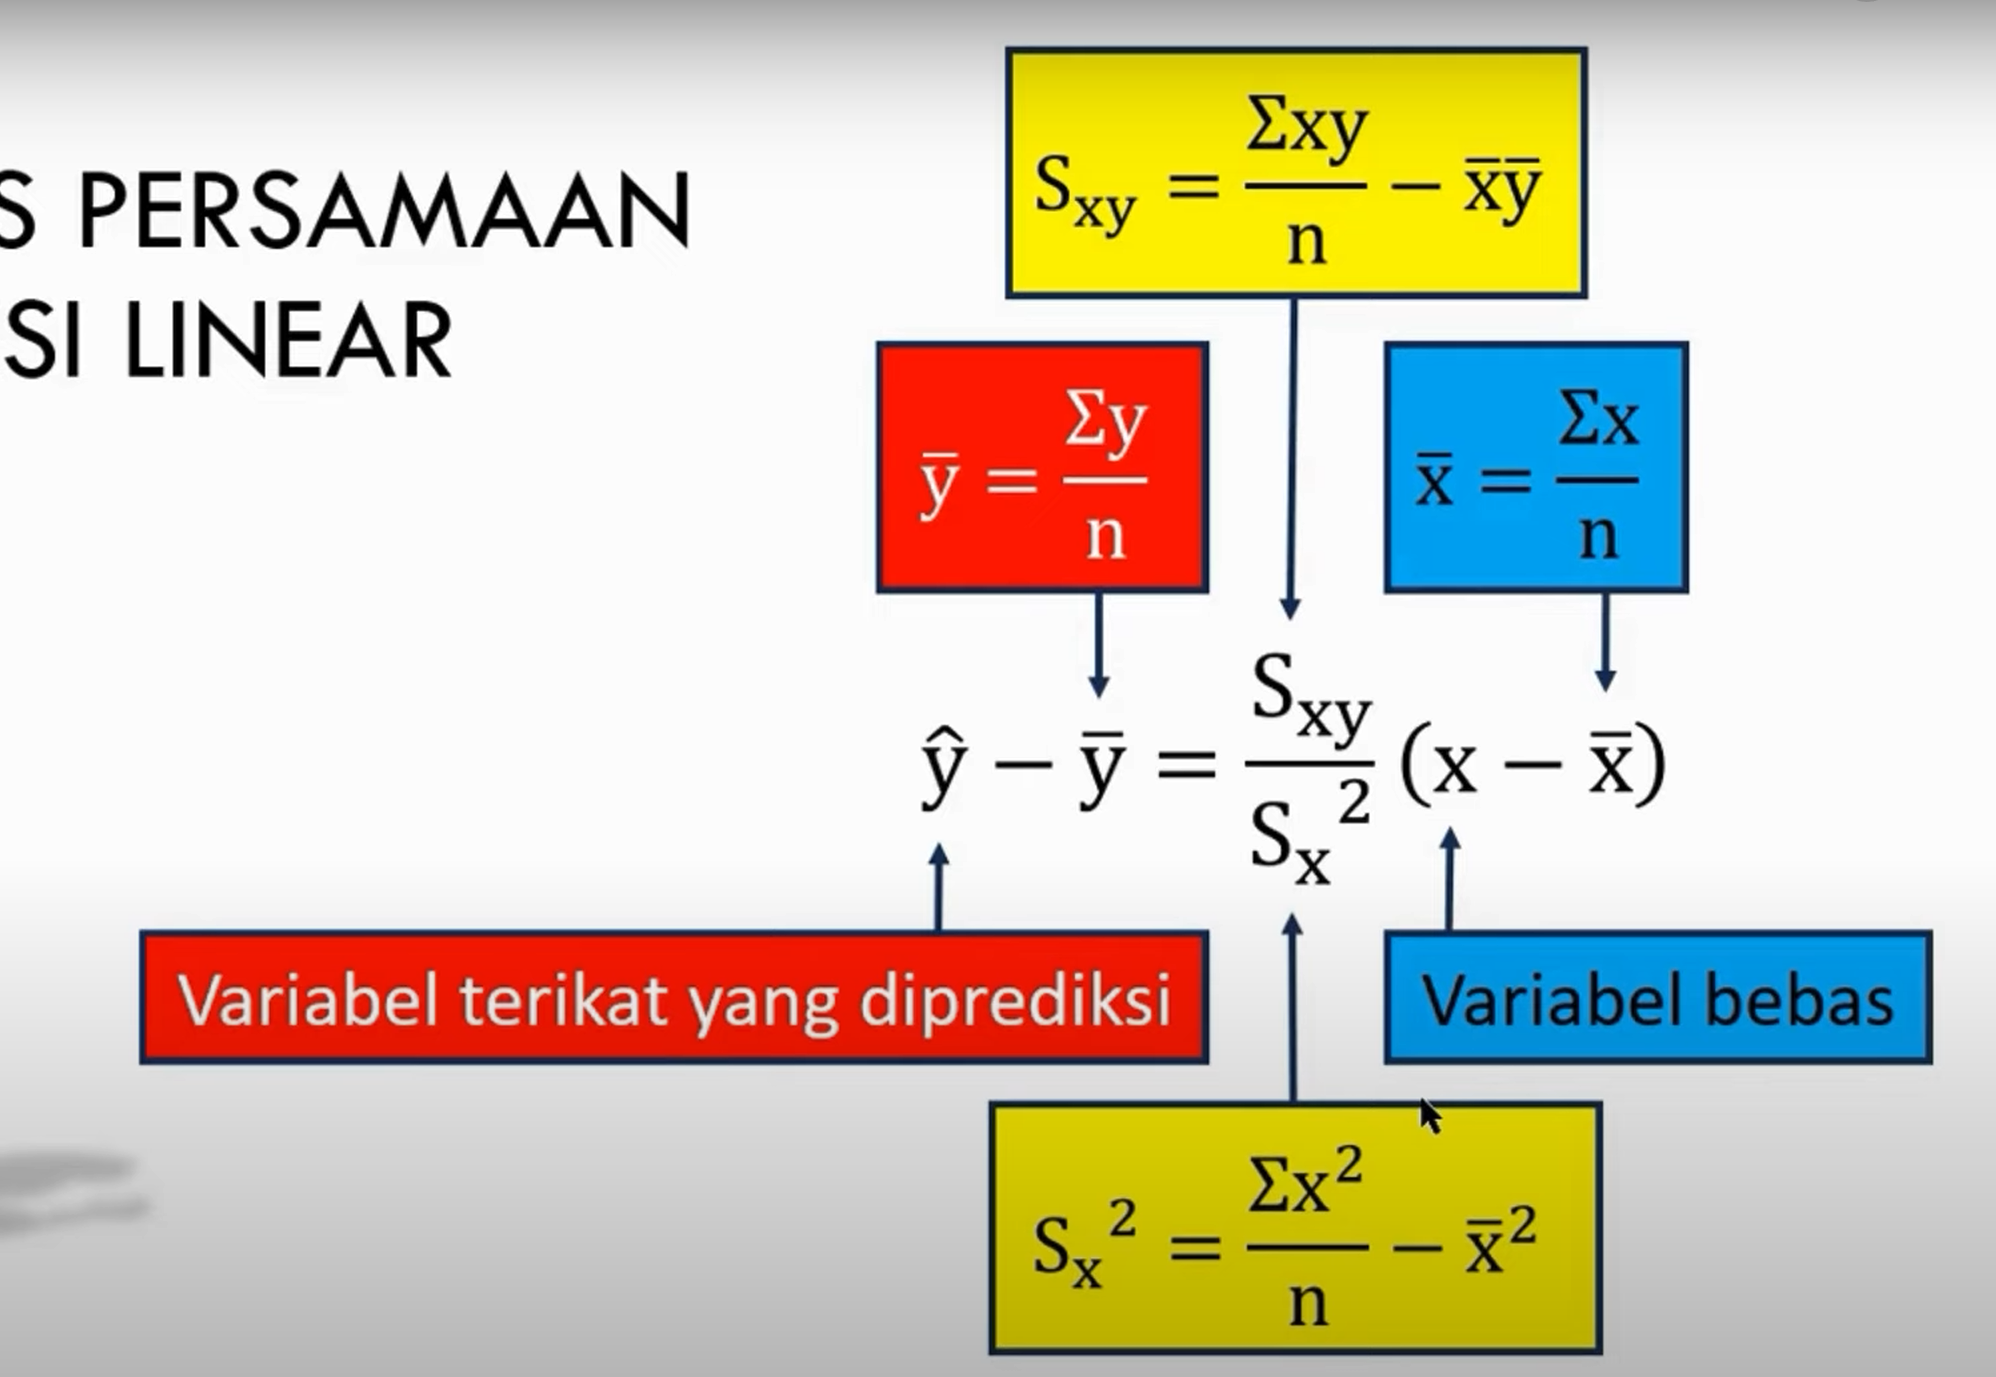

In [203]:
display(Image(filename='/content/drive/My Drive/Colab Notebooks/Rumus.png',
              width=850,
              height=600))



**penjelasan**
* y1 = variabel terikat yang di prediksi
* x1 = variable bebas
* x2 = rata-rata nilai variabel x
* y2 = rata-rata nilai variabel y
* Sxy = kovariansi dari x dan y
* S(x)^2 = kuadrat standar deviasi dari x
* sum y = penjumlahan semua variabel y
* sum x = penjumlaham semua variabel x
* sum (x)^2 = penjumlahan x kuadrat semua data
* sum (xy) = hasil dari penjumlahan x dan y semua data
* n = banyaknya jumlah data

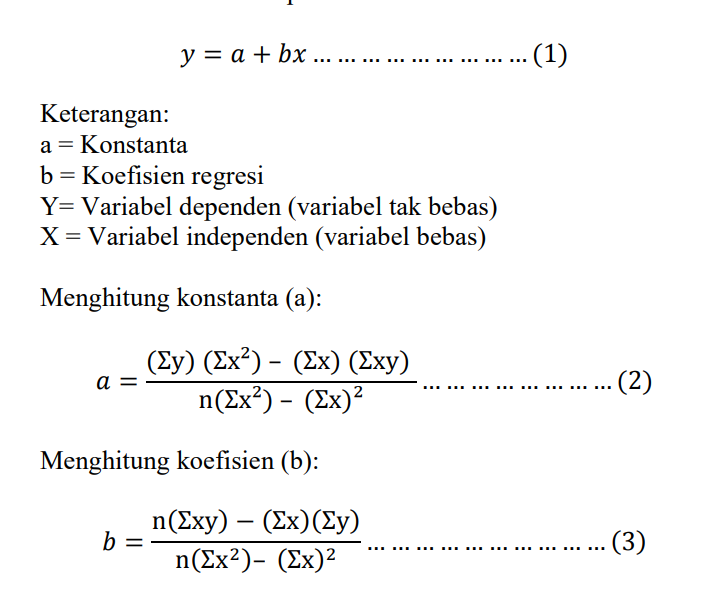

In [204]:
display(Image(filename='/content/drive/My Drive/Colab Notebooks/Rumus2.png'))

# CONTOH KASUS PERTAMA

**Sumber:**
**https://youtu.be/cLmtaBTrtnk?si=64gsrBJ35RWXTybD**

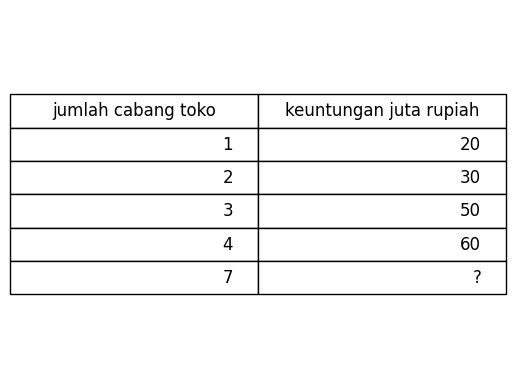

In [205]:
class data:
    # Data untuk tabel
    data = np.array([
        ["jumlah cabang toko", "keuntungan juta rupiah"],
        [1, 20],
        [2, 30],
        [3, 50],
        [4, 60],
        [7, "?"],
    ])

    # Buat tabel

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=data[1:, :], colLabels=data[0, :], loc="center")

    # Atur properti tabel
    table.set_fontsize(14)
    table.scale(1, 2)

    # Cetak tabel
    plt.show()

**berapa keuntungan jika jumlah cabang toko ada 7?**


**penjelasan**
* y1 = variabel terikat yang di prediksi
* x1 = variable bebas
* x2 = rata-rata nilai variabel x
* y2 = rata-rata nilai variabel y
* Sxy = kovariansi dari x dan y
* S(x)^2 = kuadrat standar deviasi dari x
* sum y = penjumlahan semua variabel y
* sum x = penjumlaham semua variabel x
* sum (x)^2 = penjumlahan x kuadrat semua data
* sum (xy) = hasil dari penjumlahan x dan y semua data
* n = banyaknya jumlah data

Persamaan regresi linear: y = 14.00x + 5.00


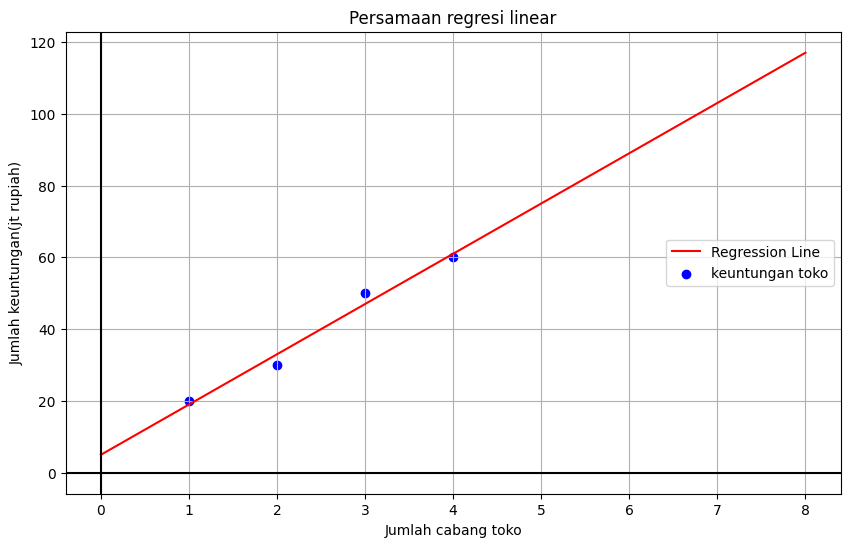

In [206]:
def regresi_linear(x, y):
    # Hitung jumlah data
    n = len(x)

    # Hitung mean x dan y
    sum_x = sum(x) / n
    sum_y = sum(y) / n

    # Hitung koefisien regresi
    Sxy = sum((x[i] - sum_x) * (y[i] - sum_y) for i in range(n))
    Sxxx2 = sum((x[i] - sum_x) ** 2 for i in range(n))
    m = Sxy / Sxxx2
    # Hitung konstanta regresi
    b = sum_y - m * sum_x

    # Kembalikan koefisien dan konstanta regresi
    return m, b

# Contoh data
x = [1, 2, 3, 4]
y = [20, 30, 50, 60]

# Hitung regresi linear
m, b = regresi_linear(x, y)

# Cetak hasil
print("Persamaan regresi linear: y = {:.2f}x + {:.2f}".format(m, b))

# Memvisualisasikan data
a = np.linspace(0, 8, 150)
plt.figure(figsize=(10,6))
plt.plot(a, m*a+b, color='red', label = "Regression Line")
plt.xlabel('Jumlah cabang toko')
plt.ylabel('Jumlah keuntungan(jt rupiah)')
plt.title('Persamaan regresi linear')
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.scatter(x, y, color='blue', label ="keuntungan toko")
plt.legend()
plt.grid(True)

**Hasil prediksi keuntungan jika jumlah toko ada 7**

In [207]:
def prediksi(start,end):
    x_pred = list(range(start,end+1))
    y_pred = [m * i + b for i in x_pred]
    return y_pred



h = prediksi(7,7)

jumlah keuntungan jika jumlah cabang toko ada 7 :103.0 juta rupiah


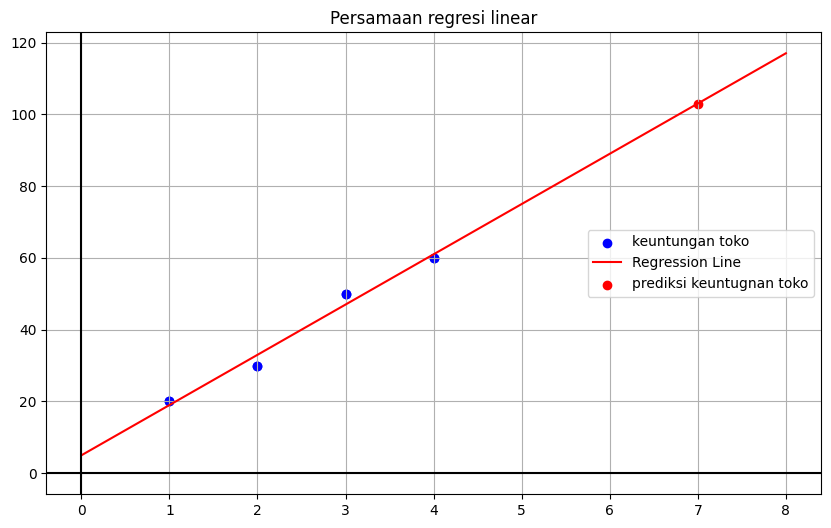

In [208]:
def prediksi(x):
    return m * x + b
print(f"jumlah keuntungan jika jumlah cabang toko ada 7 :{prediksi(7)} juta rupiah")
plt.figure(figsize=(10,6))
plt.scatter(
    x,
    y,
    color = "blue",
    label = "keuntungan toko"

)
plt.plot(
    a,
    m*a+b,
    color =  "red",
    label = "Regression Line"
)
plt.scatter(7, h, color="red",label=f"prediksi keuntugnan toko")
plt.title('Persamaan regresi linear')
plt.axvline(x=0, color='black', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.scatter(x, y, color='blue')
plt.legend()
plt.grid(True)


# CONTOH KASUS KEDUA

**PENERAPAN METODE REGRESI LINIER
SEDERHANA UNTUK PREDIKSI
PERSEDIAAN OBAT JENIS TABLET**

**Sumber:**
**https://e-jurnal.lppmunsera.org/index.php/jsii/article/download/4426/1974/16535**

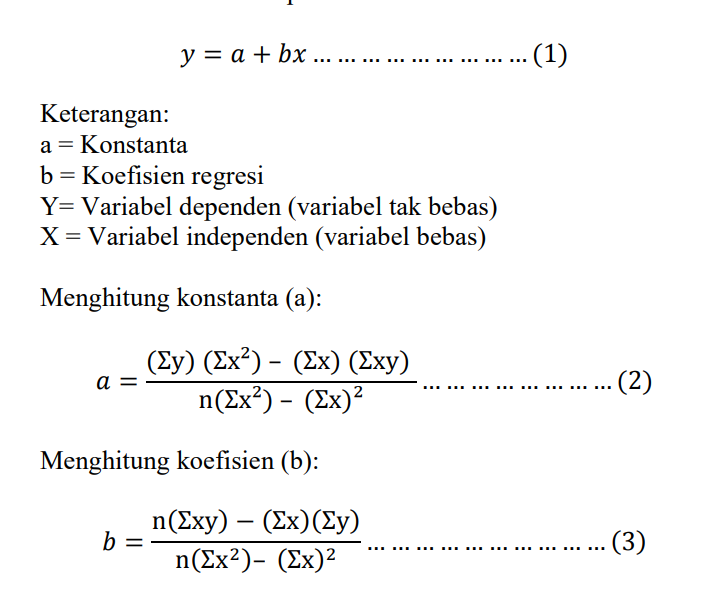

In [209]:
display(Image(filename='/content/drive/My Drive/Colab Notebooks/Rumus2.png'))

persamaan regresi linear: y = 10.389473684210527 + 5.324812030075188x


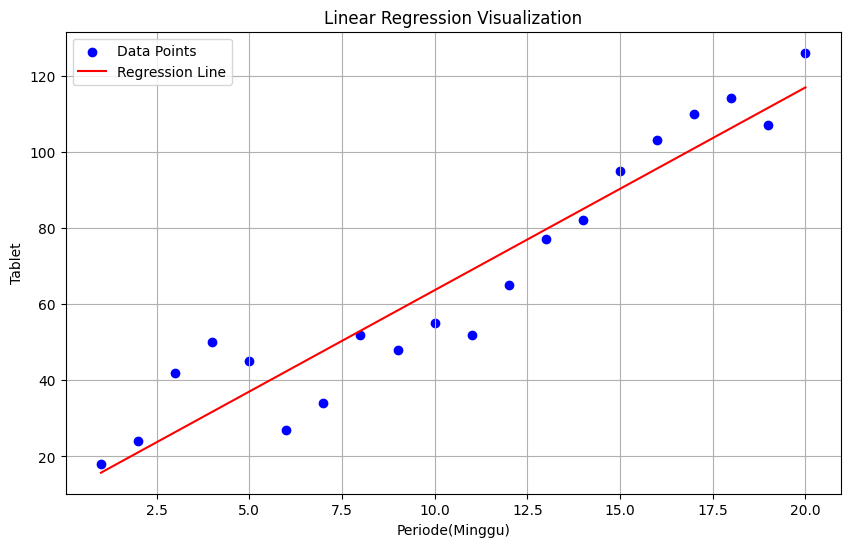

In [210]:
def regresi_linear2(x,y):
    # hitung jumlah data
    n = len(x)
    # penjelasan persamaan
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_pangkat2 = sum_x**2
    sum_xpangkat2 = sum(x[i]**2 for i in range(n))
    sum_xy = sum(x[i] * y[i] for i in range(n))
    # menghitung konstanta a
    a = (((sum_y * sum_xpangkat2) - (sum_x * sum_xy)) /
         ((n * sum_xpangkat2) - (sum_x_pangkat2)))
    # menghitung koefesien b
    b = (((n * sum_xy) - (sum_x * sum_y)) / (
        (n * sum_xpangkat2) - (sum_x_pangkat2)))
    return a, b

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = [18,24,42,50,45,27,34,52,48,55,52,65,77,82,95,103,110,114,107,126]
a,b = regresi_linear2(x,y)
print(f"persamaan regresi linear: y = {a} + {b}x")
# visualisasi persamaan regresi linear
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
x_line = np.linspace(min(x), max(x), 100)  # Create a smoother line
y_line = a + b * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('Periode(Minggu)')
plt.ylabel('Tablet')
plt.title('Linear Regression Visualization')
plt.legend()
plt.grid(True)
plt.show()

**Setelah kita mendapatkan rumus regresi linear, selanjutnya kita akan melakukan prediksi untuk menentukan prediksi periode ke 21 hingga 32**

In [211]:
def prediksi(start, end):
    x_pred = list(range(start, end + 1))
    y_pred = [a + (b * i) for i in x_pred]
    return y_pred

predicted_values = list(prediksi(21, 32))
for i in predicted_values:
  print(i)


122.21052631578948
127.53533834586467
132.86015037593984
138.18496240601505
143.50977443609023
148.8345864661654
154.15939849624058
159.4842105263158
164.80902255639097
170.13383458646615
175.45864661654136
180.78345864661654


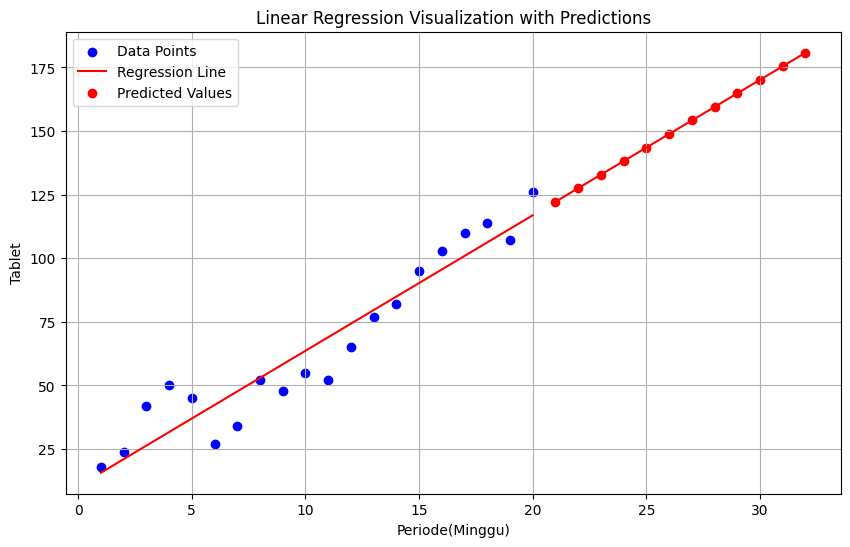

In [212]:
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
x_line = np.linspace(min(x), max(x), 100)
y_line = a + b * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')
x_pred = list(range(21, 33))
predicted_values = prediksi(21, 32)
plt.scatter(x_pred, predicted_values, color='red', label='Predicted Values')
x_pred_arr = np.array(x_pred)
predicted_values_arr = np.array(predicted_values)
y_pred_line = a + b * x_pred_arr
plt.plot(x_pred_arr, y_pred_line, color='red', linestyle='-')
plt.xlabel('Periode(Minggu)')
plt.ylabel('Tablet')
plt.title('Linear Regression Visualization with Predictions')
plt.legend()
plt.grid(True)
plt.show()

**Perhitungan Error**

**Rumus Perhitungan Error**





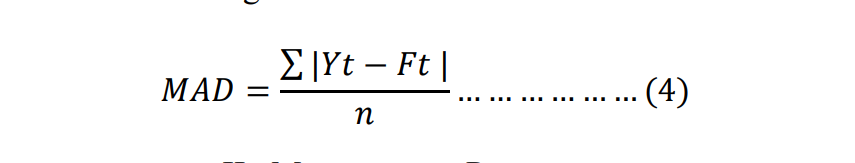

In [214]:
display(Image(filename='/content/drive/My Drive/Colab Notebooks/MAD.png'))

In [226]:
def MAD(x,y):
    m = [x[i] - y[i] for i in range(len(x))]
    k = [abs(x[i] - y[i]) for i in range(len(x))]
    return sum(k)/len(m)

Yt = [124,130,132,140,146,148,157,159,163,172,175,181]
Ft = predicted_values
print(f"MAD = {MAD(Yt,Ft)}")




MAD = 1.4941102756892224


**Berdasarkan nilai MAD di atas maka dapat disimpulkan
bahwa hasil prediksi dengan menggunakan metode regresi
linier sederhana dengan tingkat kesalahan 1,4953 %. Dari
hasil nilai error tersebut maka dapat dihitung keakurasian
prediksinya dengan menggunakan rumus di bawah ini :**

In [222]:
Akurasi = 100 - MAD
print(f"Akurasi = {Akurasi}%")

Akurasi = 98.50588972431078%


# CONTOH KASUS KETIGA

**Sumber:**

**Penerapan Metode Regresi Linear Untuk Prediksi Jumlah
Bahan Baku Produksi Selai Bilfagi**